# Hypertension 


In [ ]:

import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

os.getcwd()


'c:\\Users\\user\\MACHINE_LEARNING_MODEL\\Hypertension'

In [22]:
data = pd.read_csv("hypertension_dataset.csv")

data.head ()


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [23]:
# Shape of the dataset
print("Dataset shape:", data.shape)

# Column types and missing values
print(data.info())

print(data.describe())

data.columns


Dataset shape: (1985, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB
None
               Age  Salt_Intake  Stress_Score  Sleep_Duration          BMI
count  1985.000000  1985.000000   1985.000000     1985.000000  1985.000000
mean     50.341058     8.531688      

Index(['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration',
       'BMI', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')

# AGE 

In [24]:
import pandas as pd
import plotly.express as px

# Calculate average age by hypertension status
age_avg = data.groupby("Has_Hypertension")["Age"].mean().reset_index()

# Create bar chart
fig = px.bar(
    age_avg,
    x="Has_Hypertension",
    y="Age",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="Age",
    labels={"Has_Hypertension": "Has Hypertension", "Age": "Average Age"},
    title="Average Age by Hypertension Status"
)

# Show values on bars
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Update layout for Word-friendly size, white background, and proper margins
fig.update_layout(
    width=600,               # narrow width
    height=400,              # shorter height
    paper_bgcolor='white',   # background outside plot
    plot_bgcolor='white',    # background inside plot
    yaxis=dict(title="Average Age", range=[0, age_avg['Age'].max() + 10]),  # add space above bars
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),       # center title
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)  # increase margins to prevent cut-off
)

# Display in browser
fig.show()


In [25]:

age_summary = (
    data
    .groupby("Has_Hypertension")["Age"]
    .agg(
        Mean="mean",
        Median="median",
        Std_Dev="std",
        Min="min",
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        Max="max"
    )
)

# Add Interquartile Range (IQR)
age_summary["IQR"] = age_summary["Q3"] - age_summary["Q1"]

# Round for presentation
age_summary = age_summary.round(2)

age_summary


,Mean,Median,Std_Dev,Min,Q1,Q3,Max,IQR
Has_Hypertension,,,,,,,,
No,46.08,43.0,18.95,18,30.0,61.0,84,31.0
Yes,54.28,56.0,19.06,18,38.0,70.0,84,32.0


# SALT INTAKE

In [26]:

# Calculate average salt intake by hypertension status
salt_avg = data.groupby("Has_Hypertension")["Salt_Intake"].mean().reset_index()

# Create bar chart
fig = px.bar(
    salt_avg,
    x="Has_Hypertension",
    y="Salt_Intake",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="Salt_Intake",
    labels={
        "Has_Hypertension": "Hypertension Status",
        "Salt_Intake": "Average Salt Intake (g/day)"
    },
    title="Average Salt Intake by Hypertension Status"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Layout optimized for Word documents
fig.update_layout(
    width=600,
    height=400,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        title="Average Salt Intake (g/day)",
        range=[0, salt_avg["Salt_Intake"].max() + 2]  # headroom for labels
    ),
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


In [27]:
# Summary statistics for Salt Intake by hypertension status
salt_summary = (
    data
    .groupby("Has_Hypertension")["Salt_Intake"]
    .agg(
        Mean="mean",
        Median="median",
        Std_Dev="std",
        Min="min",
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        Max="max"
    )
)

# Add Interquartile Range (IQR)
salt_summary["IQR"] = salt_summary["Q3"] - salt_summary["Q1"]

# Round for presentation
salt_summary = salt_summary.round(2)

salt_summary


,Mean,Median,Std_Dev,Min,Q1,Q3,Max,IQR
Has_Hypertension,,,,,,,,
No,8.29,8.3,1.88,2.5,7.1,9.5,14.8,2.4
Yes,8.75,8.7,2.07,2.5,7.3,10.3,16.4,3.0


# STRESS SCORE

In [28]:
# Calculate average stress score by hypertension status
stress_avg = data.groupby("Has_Hypertension")["Stress_Score"].mean().reset_index()

# Create bar chart
fig = px.bar(
    stress_avg,
    x="Has_Hypertension",
    y="Stress_Score",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="Stress_Score",
    labels={
        "Has_Hypertension": "Hypertension Status",
        "Stress_Score": "Average Stress Score"
    },
    title="Average Stress Score by Hypertension Status"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Layout optimized for Word documents
fig.update_layout(
    width=600,
    height=400,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        title="Average Stress Score",
        range=[0, stress_avg["Stress_Score"].max() + 2]  # headroom for labels
    ),
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


In [29]:
# Summary statistics for Stress Score by hypertension status
stress_summary = (
    data
    .groupby("Has_Hypertension")["Stress_Score"]
    .agg(
        Mean="mean",
        Median="median",
        Std_Dev="std",
        Min="min",
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        Max="max"
    )
)

# Add Interquartile Range (IQR)
stress_summary["IQR"] = stress_summary["Q3"] - stress_summary["Q1"]

# Round for presentation
stress_summary = stress_summary.round(2)

stress_summary


,Mean,Median,Std_Dev,Min,Q1,Q3,Max,IQR
Has_Hypertension,,,,,,,,
No,4.37,4.0,2.87,0,2.0,6.0,10,4.0
Yes,5.54,6.0,3.28,0,3.0,9.0,10,6.0


# SLEEP DURATION

In [30]:
import plotly.express as px

# Calculate average sleep duration by hypertension status
sleep_avg = data.groupby("Has_Hypertension")["Sleep_Duration"].mean().reset_index()

# Create bar chart
fig = px.bar(
    sleep_avg,
    x="Has_Hypertension",
    y="Sleep_Duration",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="Sleep_Duration",
    labels={
        "Has_Hypertension": "Hypertension Status",
        "Sleep_Duration": "Average Sleep Duration (hours)"
    },
    title="Average Sleep Duration by Hypertension Status"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Layout optimized for Word documents
fig.update_layout(
    width=600,
    height=400,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        title="Average Sleep Duration (hours)",
        range=[0, sleep_avg["Sleep_Duration"].max() + 2]  # headroom for labels
    ),
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


In [31]:
# Summary statistics for Sleep Duration by hypertension status
sleep_summary = (
    data
    .groupby("Has_Hypertension")["Sleep_Duration"]
    .agg(
        Mean="mean",
        Median="median",
        Std_Dev="std",
        Min="min",
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        Max="max"
    )
)

# Add Interquartile Range (IQR)
sleep_summary["IQR"] = sleep_summary["Q3"] - sleep_summary["Q1"]

# Round for presentation
sleep_summary = sleep_summary.round(2)

sleep_summary


,Mean,Median,Std_Dev,Min,Q1,Q3,Max,IQR
Has_Hypertension,,,,,,,,
No,6.64,6.6,1.38,2.2,5.7,7.6,11.0,1.9
Yes,6.28,6.3,1.66,1.5,5.0,7.4,11.4,2.4


# BMI

In [32]:
import plotly.express as px

# Calculate average BMI by hypertension status
bmi_avg = data.groupby("Has_Hypertension")["BMI"].mean().reset_index()

# Create bar chart
fig = px.bar(
    bmi_avg,
    x="Has_Hypertension",
    y="BMI",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="BMI",
    labels={
        "Has_Hypertension": "Hypertension Status",
        "BMI": "Average Body Mass Index (BMI)"
    },
    title="Average BMI by Hypertension Status"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Layout optimized for Word documents
fig.update_layout(
    width=600,
    height=400,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        title="Average Body Mass Index (BMI)",
        range=[0, bmi_avg["BMI"].max() + 5]  # extra headroom for labels
    ),
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


In [33]:
# Summary statistics for BMI by hypertension status
bmi_summary = (
    data
    .groupby("Has_Hypertension")["BMI"]
    .agg(
        Mean="mean",
        Median="median",
        Std_Dev="std",
        Min="min",
        Q1=lambda x: x.quantile(0.25),
        Q3=lambda x: x.quantile(0.75),
        Max="max"
    )
)

# Add Interquartile Range (IQR)
bmi_summary["IQR"] = bmi_summary["Q3"] - bmi_summary["Q1"]

# Round for presentation
bmi_summary = bmi_summary.round(2)

bmi_summary


,Mean,Median,Std_Dev,Min,Q1,Q3,Max,IQR
Has_Hypertension,,,,,,,,
No,25.33,25.4,4.18,11.9,22.7,28.2,38.4,5.5
Yes,26.64,26.6,4.71,13.4,23.4,30.2,41.9,6.8


# SLEEP DURATION

In [34]:
import plotly.express as px

# Calculate average sleep duration by hypertension status
sleep_avg = data.groupby("Has_Hypertension")["Sleep_Duration"].mean().reset_index()

# Create bar chart
fig = px.bar(
    sleep_avg,
    x="Has_Hypertension",
    y="Sleep_Duration",
    color="Has_Hypertension",
    color_discrete_map={"Yes": "red", "No": "green"},
    text="Sleep_Duration",
    labels={
        "Has_Hypertension": "Hypertension Status",
        "Sleep_Duration": "Average Sleep Duration (hours)"
    },
    title="Average Sleep Duration by Hypertension Status"
)

# Show values on bars
fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

# Layout optimized for Word documents
fig.update_layout(
    width=600,
    height=400,
    paper_bgcolor='white',
    plot_bgcolor='white',
    yaxis=dict(
        title="Average Sleep Duration (hours)",
        range=[0, sleep_avg["Sleep_Duration"].max() + 2]  # headroom for labels
    ),
    xaxis=dict(title="Hypertension Status"),
    title=dict(x=0.5),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    margin=dict(l=50, r=50, t=80, b=50)
)

fig.show()


# MACHINE LEARNING MODEL

In [35]:
def wranger(data):
    drop_cols = ['Salt_Intake', 'Sleep_Duration', 'Exercise_Level', 'Medication']
    y = data['Has_Hypertension']
    X = data.drop(columns=drop_cols + ['Has_Hypertension'])
    X = pd.get_dummies(X, drop_first=True)  # encode categorical variables
    return X, y
X, y = wranger(data)
print(X.head())

   Age  Stress_Score   BMI  BP_History_Normal  BP_History_Prehypertension  \
0   69             9  25.8               True                       False   
1   32            10  23.4               True                       False   
2   78             3  18.7               True                       False   
3   38            10  22.1              False                       False   
4   41             1  16.2              False                        True   

   Family_History_Yes  Smoking_Status_Smoker  
0                True                  False  
1               False                  False  
2               False                  False  
3               False                  False  
4               False                  False  


In [36]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Check the shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1588, 7)
X_test: (397, 7)
y_train: (1588,)
y_test: (397,)


In [37]:

# Define the model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='f1', verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1135: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan n

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8488664987405542
Confusion Matrix:
 [[166  25]
 [ 35 171]]
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.87      0.85       191
         Yes       0.87      0.83      0.85       206

    accuracy                           0.85       397
   macro avg       0.85      0.85      0.85       397
weighted avg       0.85      0.85      0.85       397



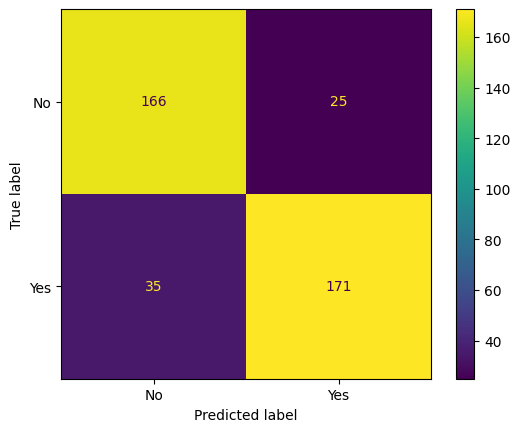

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, display_labels=["No", "Yes"])


# GBM

In [ ]:

gbm = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_gbm = grid_search.best_estimator_
y_pred = best_gbm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 486 candidates, totalling 2430 fits


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1135: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan n

Best Parameters: {'learning_rate': 0.01, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Accuracy: 0.8413098236775819
Confusion Matrix:
 [[158  33]
 [ 30 176]]
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.83      0.83       191
         Yes       0.84      0.85      0.85       206

    accuracy                           0.84       397
   macro avg       0.84      0.84      0.84       397
weighted avg       0.84      0.84      0.84       397



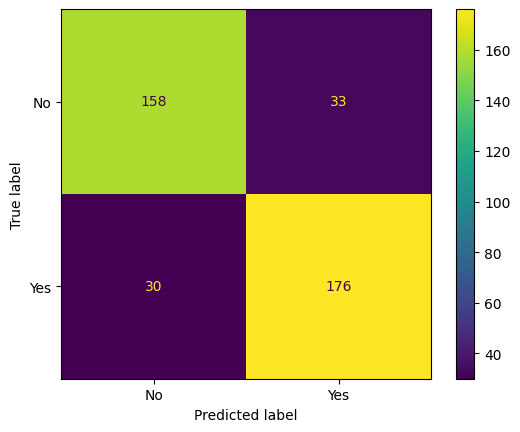

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_gbm, X_test, y_test)
plt.show()
